In [1]:
 # Import SQLAlchemy `automap` and other dependencies
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, inspect, text

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
 # Create the connection engine
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [3]:
 # Create the inspector and connect it to the engine

# INSPECT
inspector_gadget = inspect(engine)

# get all tables
table_names = inspector_gadget.get_table_names()
for table in table_names:
    print(table)
    
    # get columns for table
    for column in inspector_gadget.get_columns(table):
        print(column)
        
    print()

measurement
{'name': 'id', 'type': INTEGER(), 'nullable': False, 'default': None, 'autoincrement': 'auto', 'primary_key': 1}
{'name': 'station', 'type': TEXT(), 'nullable': True, 'default': None, 'autoincrement': 'auto', 'primary_key': 0}
{'name': 'date', 'type': TEXT(), 'nullable': True, 'default': None, 'autoincrement': 'auto', 'primary_key': 0}
{'name': 'prcp', 'type': FLOAT(), 'nullable': True, 'default': None, 'autoincrement': 'auto', 'primary_key': 0}
{'name': 'tobs', 'type': FLOAT(), 'nullable': True, 'default': None, 'autoincrement': 'auto', 'primary_key': 0}

station
{'name': 'id', 'type': INTEGER(), 'nullable': False, 'default': None, 'autoincrement': 'auto', 'primary_key': 1}
{'name': 'station', 'type': TEXT(), 'nullable': True, 'default': None, 'autoincrement': 'auto', 'primary_key': 0}
{'name': 'name', 'type': TEXT(), 'nullable': True, 'default': None, 'autoincrement': 'auto', 'primary_key': 0}
{'name': 'latitude', 'type': FLOAT(), 'nullable': True, 'default': None, 'autoi

In [4]:
 #### READ ####

query = text("""
                SELECT
                    *
                FROM
                    measurement
                limit 10
            """)

pd.read_sql(query, engine)

,id,station,date,prcp,tobs
0,1,USC00519397,2010-01-01,0.08,65.0
1,2,USC00519397,2010-01-02,0.00,63.0
2,3,USC00519397,2010-01-03,0.00,74.0
3,4,USC00519397,2010-01-04,0.00,76.0
4,5,USC00519397,2010-01-06,NaN,73.0
5,6,USC00519397,2010-01-07,0.06,70.0
6,7,USC00519397,2010-01-08,0.00,64.0
7,8,USC00519397,2010-01-09,0.00,68.0
8,9,USC00519397,2010-01-10,0.00,73.0
9,10,USC00519397,2010-01-11,0.01,64.0


In [5]:
 #### READ ####

query = text("""
                SELECT
                    *
                FROM
                    station
                limit 10
            """)

pd.read_sql(query, engine)

,id,station,name,latitude,longitude,elevation
0,1,USC00519397,"WAIKIKI 717.2, HI US",21.27160,-157.81680,3.0
1,2,USC00513117,"KANEOHE 838.1, HI US",21.42340,-157.80150,14.6
2,3,USC00514830,"KUALOA RANCH HEADQUARTERS 886.9, HI US",21.52130,-157.83740,7.0
3,4,USC00517948,"PEARL CITY, HI US",21.39340,-157.97510,11.9
4,5,USC00518838,"UPPER WAHIAWA 874.3, HI US",21.49920,-158.01110,306.6
5,6,USC00519523,"WAIMANALO EXPERIMENTAL FARM, HI US",21.33556,-157.71139,19.5
6,7,USC00519281,"WAIHEE 837.5, HI US",21.45167,-157.84889,32.9
7,8,USC00511918,"HONOLULU OBSERVATORY 702.2, HI US",21.31520,-157.99920,0.9
8,9,USC00516128,"MANOA LYON ARBO 785.2, HI US",21.33310,-157.80250,152.4


In [6]:
 #### READ ####

query = text("""
                SELECT
                    date,
                    count(*) as num_rows
                FROM
                    measurement
                group by
                    date
                order by
                    date desc
                limit 10
            """)

pd.read_sql(query, engine)

,date,num_rows
0,2017-08-23,4
1,2017-08-22,3
2,2017-08-21,4
3,2017-08-20,3
4,2017-08-19,4
5,2017-08-18,4
6,2017-08-17,4
7,2017-08-16,4
8,2017-08-15,5
9,2017-08-14,5


In [7]:
 #### READ ####

query = text("""
                SELECT
                    date,
                    station,
                    prcp
                FROM
                    measurement
                WHERE
                    date >= '2016-08-23';
            """)

df = pd.read_sql(query, engine)
df.head()

,date,station,prcp
0,2016-08-23,USC00519397,0.00
1,2016-08-24,USC00519397,0.08
2,2016-08-25,USC00519397,0.08
3,2016-08-26,USC00519397,0.00
4,2016-08-27,USC00519397,0.00


In [8]:
df.station.value_counts()

USC00519397    361
USC00519281    352
USC00516128    349
USC00513117    343
USC00519523    337
USC00514830    305
USC00517948    183
Name: station, dtype: int64

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2230 entries, 0 to 2229
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   date     2230 non-null   object 
 1   station  2230 non-null   object 
 2   prcp     2021 non-null   float64
dtypes: float64(1), object(2)
memory usage: 52.4+ KB


In [10]:
df["date"] = pd.to_datetime(df["date"])

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2230 entries, 0 to 2229
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   date     2230 non-null   datetime64[ns]
 1   station  2230 non-null   object        
 2   prcp     2021 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 52.4+ KB


In [11]:
df1 = df.dropna().sort_values(by="date", ascending=True).reset_index(drop=True)
df1.head(10)

,date,station,prcp
0,2016-08-23,USC00519397,0.00
1,2016-08-23,USC00519523,0.02
2,2016-08-23,USC00514830,0.05
3,2016-08-23,USC00516128,0.70
4,2016-08-23,USC00513117,0.15
5,2016-08-23,USC00519281,1.79
6,2016-08-24,USC00519523,1.22
7,2016-08-24,USC00519397,0.08
8,2016-08-24,USC00519281,2.15
9,2016-08-24,USC00513117,2.15


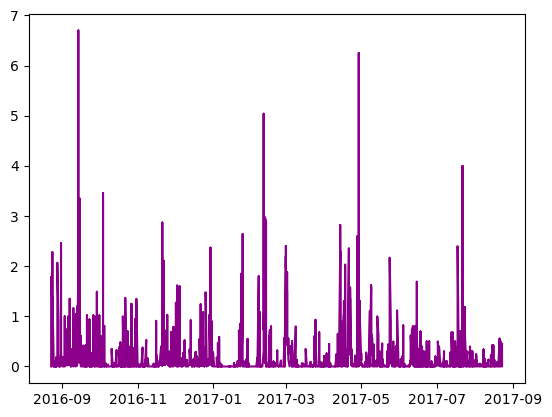

In [24]:
plt.plot(df1.date, df1.prcp, color="darkmagenta")
plt.show()

In [13]:
df1.prcp.describe()

count    2021.000000
mean        0.177279
std         0.461190
min         0.000000
25%         0.000000
50%         0.020000
75%         0.130000
max         6.700000
Name: prcp, dtype: float64

In [14]:
df.groupby("station").prcp.describe()

,count,mean,std,min,25%,50%,75%,max
station,,,,,,,,
USC00513117,343.0,0.141429,0.341245,0.0,0.00,0.03,0.120,2.90
USC00514830,265.0,0.125434,0.316290,0.0,0.00,0.02,0.120,2.39
USC00516128,328.0,0.450640,0.717174,0.0,0.01,0.19,0.610,6.70
USC00517948,60.0,0.076500,0.317857,0.0,0.00,0.00,0.025,2.40
USC00519281,352.0,0.198949,0.419182,0.0,0.00,0.06,0.190,2.98
USC00519397,359.0,0.044819,0.188810,0.0,0.00,0.00,0.020,2.62
USC00519523,314.0,0.121051,0.509002,0.0,0.00,0.00,0.060,6.25


In [15]:
 #### READ ####

query = text("""
                SELECT
                    station,
                    count(*) as num_obs
                FROM
                    measurement
                group by
                    station
                order by
                    num_obs desc;
            """)

pd.read_sql(query, engine)

,station,num_obs
0,USC00519281,2772
1,USC00519397,2724
2,USC00513117,2709
3,USC00519523,2669
4,USC00516128,2612
5,USC00514830,2202
6,USC00511918,1979
7,USC00517948,1372
8,USC00518838,511


In [16]:
 #### READ ####

query = text("""
                SELECT
                    station,
                    min(prcp),
                    avg(prcp),
                    max(prcp)
                FROM
                    measurement
                where
                    station = 'USC00519281';
            """)

pd.read_sql(query, engine)

,station,min(prcp),avg(prcp),max(prcp)
0,USC00519281,0.0,0.212352,9.64


In [17]:
 #### READ ####

query = text("""
                SELECT
                    date,
                    station,
                    tobs
                FROM
                    measurement
                WHERE
                    date >= '2016-08-23'
                    and station = 'USC00519281'
            """)

df = pd.read_sql(query, engine)
df.head()

,date,station,tobs
0,2016-08-23,USC00519281,77.0
1,2016-08-24,USC00519281,77.0
2,2016-08-25,USC00519281,80.0
3,2016-08-26,USC00519281,80.0
4,2016-08-27,USC00519281,75.0


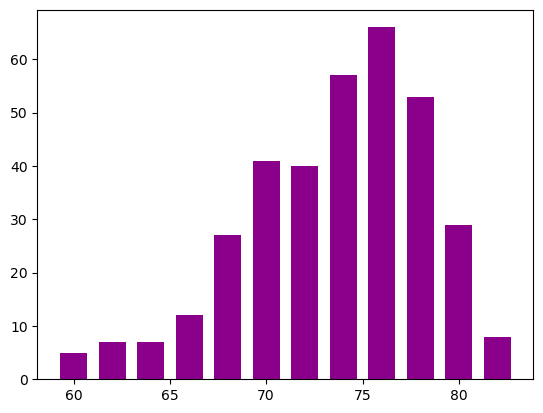

In [22]:
plt.hist(df.tobs, bins=12, color="darkmagenta", rwidth=0.7)
plt.show()